## Project Content : 

Project 2 is an analysis of a dataset to answer one or more questions about the data. 

I (Professor. John Wan) will be posting your submitted notebook online. 

Please indicate in your submission whether you want your name associated with the notebook.

Do not upload data with your notebook. 

In [59]:
# Data Source : https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices

# Data set : cab_rides.csv

In [1]:
# Importing all the necessary libraries for analysis of the dataset.

import pandas as pd                         #data manipulation
import numpy as np                          #working with arrays
import seaborn as sns                       #visualization
import matplotlib.pyplot as plt             #visualization
%matplotlib inline

In [2]:
#Loading the "cab_rides.csv" into the "cars_df" dataframe using Pandas

cars_df = pd.read_csv(r'C:\Users\usrik\Downloads\project 2 dataset\cab_rides.csv',encoding='unicode_escape')

In [3]:
# cars_df = pd.read_csv("https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices/cab_rides.csv",engine='python')

In [4]:
cars_df.shape #cars_df has 693,071 rows and 10 columns

(693071, 10)

In [5]:
cars1=cars_df.head(20000) #Loading the first 20000 rows into cars1

In [6]:
cars1.tail() #Display's the last 5 rows 

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
19995,2.69,Lyft,1544729108874,Theatre District,Fenway,19.5,1.0,0cbb675c-04a5-4926-bd6f-daf818a19a6a,lyft_premier,Lux
19996,2.69,Lyft,1544990112242,Theatre District,Fenway,11.0,1.0,255f45a8-6ac5-413c-b036-b4bb5400ed83,lyft,Lyft
19997,2.69,Lyft,1545115513436,Theatre District,Fenway,16.5,1.0,4929b90e-b60f-46d2-8e2f-ba11369ef675,lyft_plus,Lyft XL
19998,2.69,Lyft,1543227070712,Theatre District,Fenway,34.0,1.0,70f82ea6-7369-4866-b7e6-942b804d611f,lyft_luxsuv,Lux Black XL
19999,2.69,Lyft,1544781908648,Theatre District,Fenway,26.0,1.0,826274b4-255e-41ae-afd9-78fb93fe642e,lyft_lux,Lux Black


In [7]:
cars = cars1.drop(['id'], axis=1) #Dropping the "id" column

In [8]:
cars['time_stamp'] = pd.to_datetime(cars['time_stamp'],unit='ms') #Converting from unix epoch time to standard date time format

In [9]:
cars['date'] = cars['time_stamp'].dt.date  #date
cars['hour'] = cars['time_stamp'].dt.hour  #hour
cars['minute'] = cars['time_stamp'].dt.minute #minute

cars.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,date,hour,minute
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,2018-12-16,9,30
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,2018-11-27,2,0
2,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,2018-11-28,1,0
3,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,2018-11-30,4,53
4,0.44,Lyft,2018-11-29 03:49:20.223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,2018-11-29,3,49


### Let us find out more information about the dataset..

In [10]:
cars.dtypes

distance                   float64
cab_type                    object
time_stamp          datetime64[ns]
destination                 object
source                      object
price                      float64
surge_multiplier           float64
product_id                  object
name                        object
date                        object
hour                         int64
minute                       int64
dtype: object

In [11]:
cars.ndim

2

In [12]:
len(cars)

20000

In [13]:
cars.shape

(20000, 12)

In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   distance          20000 non-null  float64       
 1   cab_type          20000 non-null  object        
 2   time_stamp        20000 non-null  datetime64[ns]
 3   destination       20000 non-null  object        
 4   source            20000 non-null  object        
 5   price             18431 non-null  float64       
 6   surge_multiplier  20000 non-null  float64       
 7   product_id        20000 non-null  object        
 8   name              20000 non-null  object        
 9   date              20000 non-null  object        
 10  hour              20000 non-null  int64         
 11  minute            20000 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.8+ MB


In [15]:
cars.describe()

,distance,price,surge_multiplier,hour,minute
count,20000.000000,18431.000000,20000.000000,20000.000000,20000.000000
mean,2.148872,16.430525,1.015100,11.631050,29.097250
std,1.124711,9.231276,0.094921,6.978328,17.293225
min,0.020000,2.500000,1.000000,0.000000,0.000000
25%,1.250000,9.000000,1.000000,6.000000,15.000000
50%,2.080000,13.500000,1.000000,12.000000,30.000000
75%,2.860000,22.500000,1.000000,18.000000,45.000000
max,7.460000,80.000000,2.500000,23.000000,59.000000


In [16]:
cars.nunique()

distance              397
cab_type                2
time_stamp          20000
destination            12
source                 12
price                 106
surge_multiplier        6
product_id             13
name                   13
date                   17
hour                   24
minute                 60
dtype: int64

In [17]:
#Value_counts() returns a series containing count of unique rows in the dataframe(cars).

cars["distance"].value_counts()

#The distance from source to destination for most of the cab rides(uber+lyft) = 3.05 miles

3.05    307
2.66    292
1.41    289
1.50    288
1.35    275
       ... 
0.03      1
3.68      1
0.79      1
0.82      1
2.28      1
Name: distance, Length: 397, dtype: int64

In [18]:
cars["cab_type"].value_counts() 

#There are 2 types of cabs. (1) Uber - 10971 and (2)Lyft - 9029

Uber    10971
Lyft     9029
Name: cab_type, dtype: int64

In [19]:
cars["destination"].value_counts()

#The endpoint to most of the trips is "North End".

North End                  1859
Haymarket Square           1743
Northeastern University    1739
Fenway                     1719
Beacon Hill                1713
North Station              1700
Theatre District           1644
Boston University          1624
Back Bay                   1593
South Station              1591
West End                   1580
Financial District         1495
Name: destination, dtype: int64

In [20]:
cars["source"].value_counts()

#The starting point of most of the cab rides is "Theatre District".

Theatre District           1815
North Station              1782
Financial District         1722
Fenway                     1711
Haymarket Square           1711
West End                   1687
North End                  1670
Beacon Hill                1656
Back Bay                   1613
Northeastern University    1547
Boston University          1543
South Station              1543
Name: source, dtype: int64

In [21]:
cars["surge_multiplier"].value_counts()

#The lowest surge_multiplier is 1 and the highest surge_multiplier is 2.50

1.00    19334
1.25      361
1.50      145
1.75       95
2.00       59
2.50        6
Name: surge_multiplier, dtype: int64

In [22]:
cars["time_stamp"].value_counts()

2018-12-02 18:18:04.095    1
2018-11-26 15:05:10.336    1
2018-12-03 01:43:05.872    1
2018-12-10 00:53:25.509    1
2018-12-02 12:58:02.696    1
                          ..
2018-12-18 08:20:10.138    1
2018-11-26 12:14:10.034    1
2018-11-28 12:11:23.241    1
2018-12-03 14:43:06.609    1
2018-12-01 02:11:11.407    1
Name: time_stamp, Length: 20000, dtype: int64

In [23]:
cars["price"].value_counts()

#1512 cab rides out of 20000 costed 7.0USD

7.0     1512
16.5    1310
10.5    1145
13.5     993
9.0      935
        ... 
80.0       1
48.0       1
40.0       1
54.0       1
58.0       1
Name: price, Length: 106, dtype: int64

In [24]:
cars["name"].value_counts()

#UberPool is preferred when compared to all other cab types.

UberPool        1570
Black SUV       1569
UberX           1569
Taxi            1569
UberXL          1567
Black           1566
WAV             1561
Lux             1516
Lux Black XL    1513
Lyft XL         1506
Shared          1501
Lux Black       1500
Lyft            1493
Name: name, dtype: int64

### Lets check for missing values / Nan values ..

In [25]:
cars.isnull()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,date,hour,minute
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
cars.isnull().sum() #we have 1569 missing values

distance               0
cab_type               0
time_stamp             0
destination            0
source                 0
price               1569
surge_multiplier       0
product_id             0
name                   0
date                   0
hour                   0
minute                 0
dtype: int64

In [27]:
#Lets fill these 1569 missing values in price with the mean of the column
cars['price'] = cars['price'].fillna((cars['price'].mean()))
print('!!THE DATAFRAME HAS BEEN UPDATED SUCCESSFULLY!!')

!!THE DATAFRAME HAS BEEN UPDATED SUCCESSFULLY!!


In [28]:
cars.isnull().sum() #Now, there are no null values in the price column.

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
product_id          0
name                0
date                0
hour                0
minute              0
dtype: int64

In [29]:
cars.sample(5) #Returns a random sample of items

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,date,hour,minute
17862,0.56,Uber,2018-11-27 01:30:23.528,Haymarket Square,North Station,7.000000,1.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-11-27,1,30
5435,3.45,Uber,2018-11-27 20:00:24.365,South Station,Back Bay,10.500000,1.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-11-27,20,0
1468,2.03,Lyft,2018-11-27 12:54:23.004,Theatre District,Northeastern University,13.500000,1.0,lyft_plus,Lyft XL,2018-11-27,12,54
9481,3.04,Uber,2018-12-03 02:17:58.008,West End,Boston University,9.500000,1.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-03,2,17
7783,2.80,Uber,2018-12-16 06:25:10.782,Boston University,West End,16.430525,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-16,6,25


### In-depth analysis with the help of Graphs

,distance,price,surge_multiplier,hour,minute
distance,1.000000,0.324181,0.006408,0.006856,-0.005452
price,0.324181,1.000000,0.230896,0.001424,0.005959
surge_multiplier,0.006408,0.230896,1.000000,-0.009517,-0.002791
hour,0.006856,0.001424,-0.009517,1.000000,-0.007569
minute,-0.005452,0.005959,-0.002791,-0.007569,1.000000


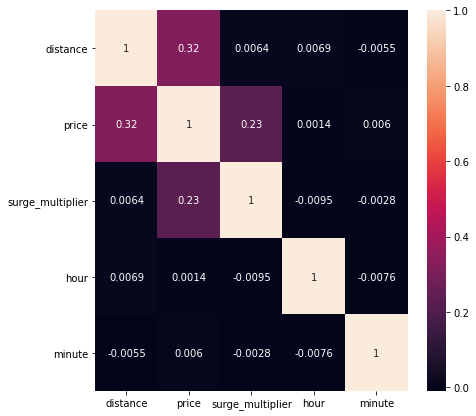

In [30]:
#Let us find the pairwise correlation of all columns in the dataframe - cars

plt.figure(figsize=(7,7))
cor= cars.corr()
sns.heatmap(cor,annot=True)
sns.color_palette("Paired")
cor

{'whiskers': [<matplotlib.lines.Line2D at 0x288bc429af0>,
 'caps': [<matplotlib.lines.Line2D at 0x288bc43b1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x288bc429790>],
 'medians': [<matplotlib.lines.Line2D at 0x288bc43b8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x288bc43bc40>],
 'means': []}

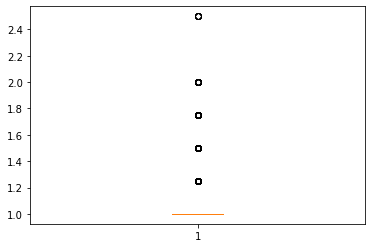

In [31]:
plt.boxplot(cars['surge_multiplier'])

{'whiskers': [<matplotlib.lines.Line2D at 0x288bc491c10>,
 'caps': [<matplotlib.lines.Line2D at 0x288bc49d2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x288bc4918b0>],
 'medians': [<matplotlib.lines.Line2D at 0x288bc49d970>],
 'fliers': [<matplotlib.lines.Line2D at 0x288bc49dcd0>],
 'means': []}

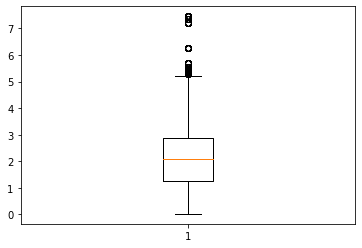

In [32]:
plt.boxplot(cars['distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x288bc4efca0>,
 'caps': [<matplotlib.lines.Line2D at 0x288bc4fc3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x288bc4ef910>],
 'medians': [<matplotlib.lines.Line2D at 0x288bc4fca60>],
 'fliers': [<matplotlib.lines.Line2D at 0x288bc4fcdc0>],
 'means': []}

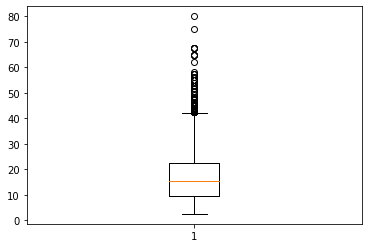

In [33]:
plt.boxplot(cars['price'])

(array([ 9029.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10971.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

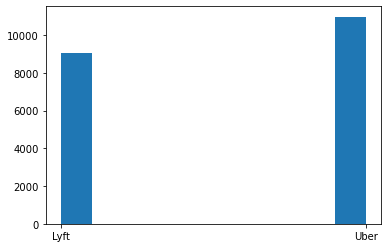

In [34]:
plt.hist(cars['cab_type'])

(array([2608., 1639., 1502., 2258., 1706., 1711., 2666., 1695., 1608.,
        2607.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

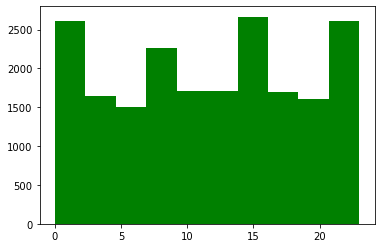

In [35]:
plt.hist(cars['hour'],color='g')

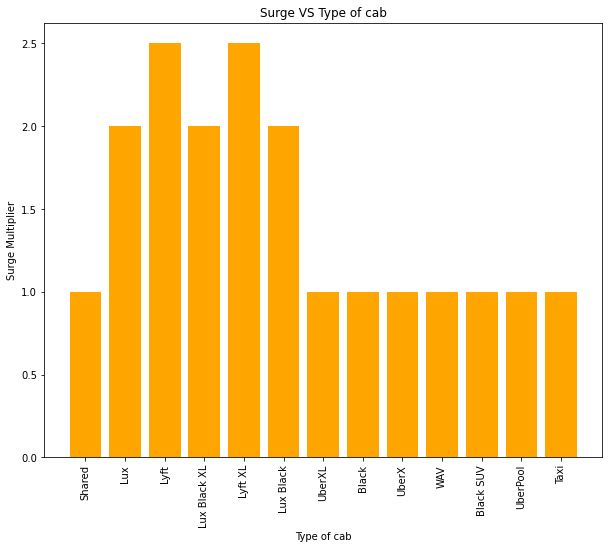

In [36]:
#Question 1. Will surge remain same for all types of cabs?

plt.figure(figsize=(10,8))
plt.bar(x=cars['name'],height=cars['surge_multiplier'],color='orange')

plt.xlabel("Type of cab")
plt.ylabel("Surge Multiplier")
plt.title("Surge VS Type of cab")
plt.tick_params(axis='x', labelrotation = 90)

#Answer 1 : No, Surge_Multiplier is high (2.5) for Lyft and Lyft XL

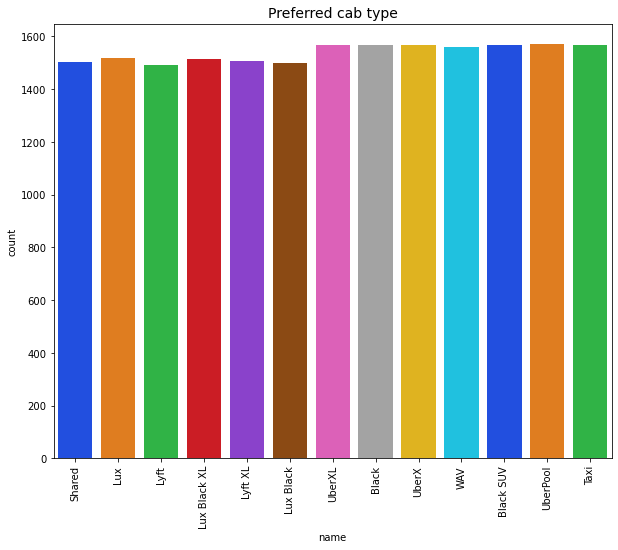

In [37]:
#Question2: Is Uber XL the preferred cab type?

plt.figure(figsize=(10,8))
sns.countplot(x='name', data=cars, palette='bright')
plt.title('Preferred cab type', fontsize=14)
plt.tick_params(axis='x', labelrotation = 90)

#Answer 2: Yes, Along with UberXL, other cab types like Black, UberX, Black SUV, Uberpool and Taxi are also highly preferred.

<Figure size 720x360 with 0 Axes>

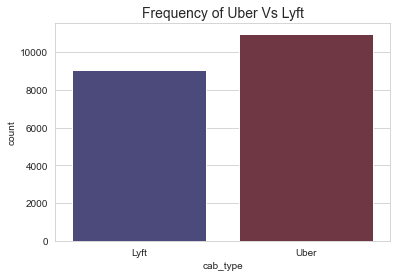

<Figure size 720x360 with 0 Axes>

In [38]:
#Question 3: Is Uber used more than Lyft?

sns.set_style("whitegrid")
sns.countplot(x = 'cab_type', data = cars, palette='icefire')
plt.title('Frequency of Uber Vs Lyft', fontsize=14)
plt.figure(figsize=(10,5))

#Answer 3: Yes, Uber is preferred to Lyft

Text(0.5, 1.0, 'Impact of Surge on Price of the Cab')

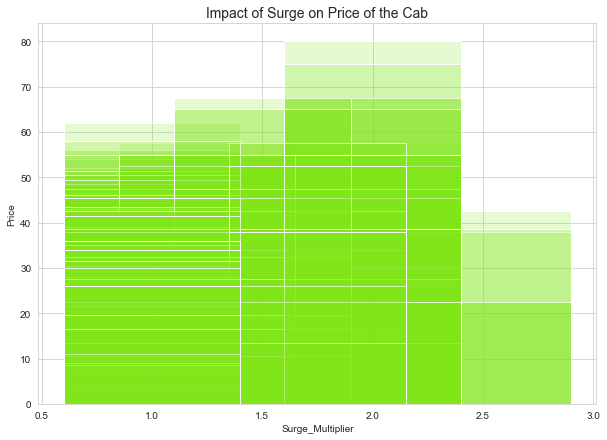

In [39]:
#Question 4: Is the price (USD) high when the surge_multiplier is 3?

plt.figure(figsize=(10,7))
plt.bar(height=cars['price'],x=cars['surge_multiplier'],color=(0.5, 0.9, 0.1, 0.2))
plt.xlabel("Surge_Multiplier")
plt.ylabel("Price")
plt.title('Impact of Surge on Price of the Cab', fontsize=14)

#Answer 4: No, The price(USD) of the cab is high for Uber and Lyft when the Surge_Multiplier is 2

<Figure size 720x360 with 0 Axes>

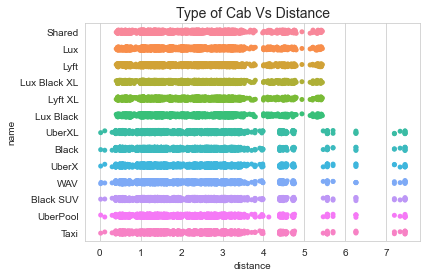

<Figure size 720x360 with 0 Axes>

In [40]:
#Question 5: Is Lyft preferred for long distance?

sns.stripplot(x=cars['distance'],y=cars['name'])
plt.title('Type of Cab Vs Distance', fontsize=14)
plt.figure(figsize=(10,5))

#Answer 5: No, People prefer Uber to Lyft when it comes to travelling long distances. UberXL, Black, UberX, WAV, Black SUV, UberPool are different categories of cars

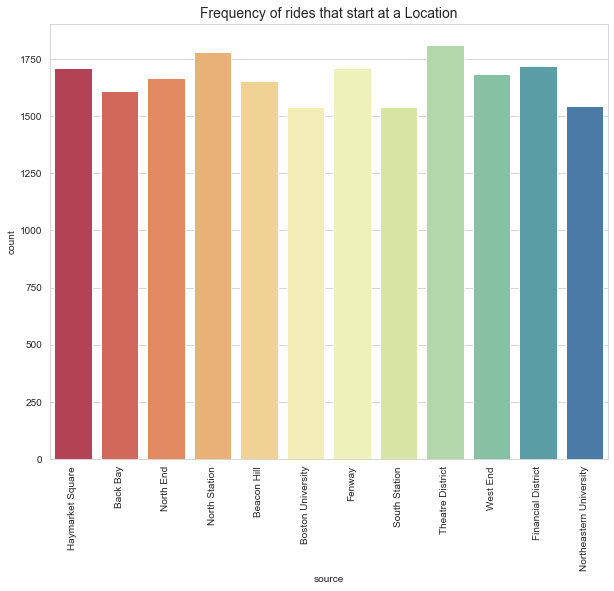

In [41]:
#Question 6: Where do most of the rides start from?

plt.figure(figsize=(10,8))
sns.countplot(x='source', data=cars, palette='Spectral')
plt.title('Frequency of rides that start at a Location', fontsize=14)
plt.tick_params(axis='x', labelrotation = 90)

#Answer 6: Most of the rides start from Theatre District and North Station

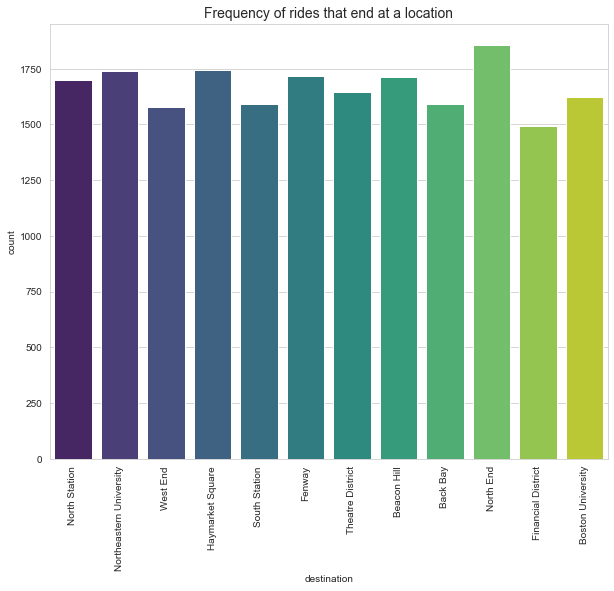

In [42]:
#Question 7: Where do most of the rides end?

plt.figure(figsize=(10,8))
sns.countplot(x='destination', data=cars, palette='viridis')
plt.title('Frequency of rides that end at a location', fontsize=14)
plt.tick_params(axis='x', labelrotation = 90)

#Answer 7: Most number of rides end at NorthEnd, Haymarket square and Northeastern University

Text(0.5, 1.0, 'Cab_type VS Price')

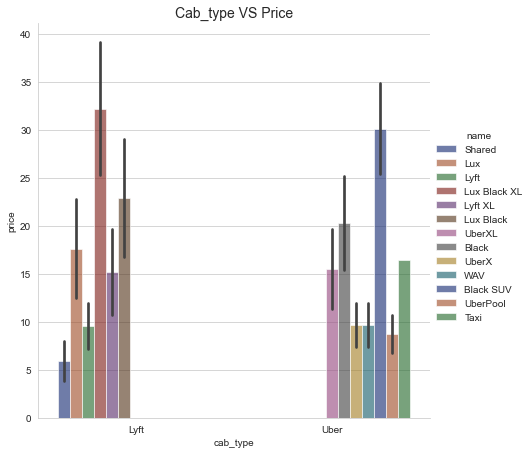

In [43]:
#catplot shows frequencies (or optionally fractions or percents) of the categories of one, two or three categorical variables.

sns.catplot(data=cars, kind="bar", x="cab_type", y="price", hue="name",ci="sd", palette="dark", alpha=.6, height=6)
plt.title('Cab_type VS Price', fontsize=14)

Text(0.5, 1.0, 'Surge_Multiplier VS Distance')

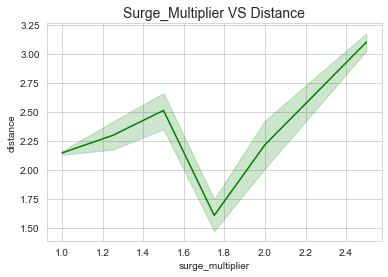

In [44]:
sns.lineplot(x='surge_multiplier', y='distance', data=cars,color='g')
plt.title('Surge_Multiplier VS Distance', fontsize=14) #Relation between Miles_Travelled and Surge_Multiplier

Text(0.5, 1.0, 'Price during Peak')

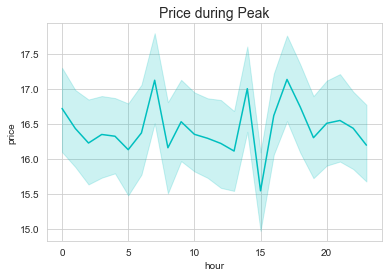

In [45]:
sns.lineplot(x='hour', y='price', data=cars,color ='c')
sns.set_style("whitegrid") 
plt.title('Price during Peak', fontsize=14) 

<AxesSubplot:xlabel='hour', ylabel='price'>

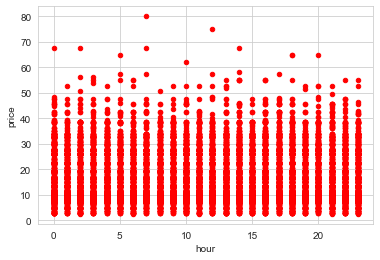

In [49]:
cars.plot.scatter(x='hour',y='price',c='r') #Same relation as above , but i plotted a scatter plot for my understanding

In [50]:
#I am splitting the cars dataset

uber = cars[cars['cab_type']=='Uber']
lyft = cars[cars['cab_type']=='Lyft']

In [51]:
uber.head(3)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,date,hour,minute
12,1.11,Uber,2018-11-30 22:13:01.179,West End,North End,12.0,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-30,22,13
13,1.11,Uber,2018-12-13 10:50:11.014,West End,North End,16.0,1.0,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-13,10,50
14,1.11,Uber,2018-12-13 19:15:03.935,West End,North End,7.5,1.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-13,19,15


In [52]:
lyft.head(3)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,date,hour,minute
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,2018-12-16,9,30
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,2018-11-27,2,0
2,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,2018-11-28,1,0


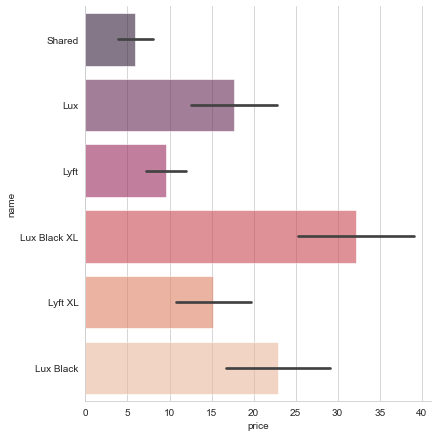

In [53]:
sns.catplot(data=lyft, kind="bar", y="name", x="price",ci="sd", palette="rocket", alpha=.6, height=6)

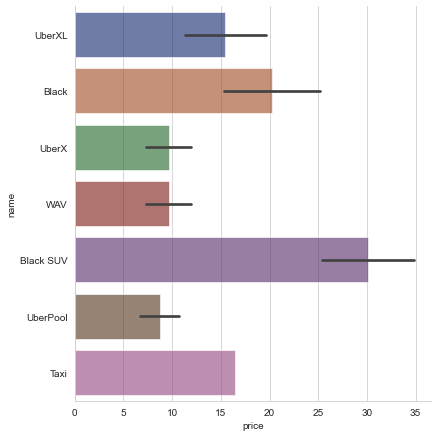

In [54]:
sns.catplot(data=uber, kind="bar", y="name", x="price",ci="sd", palette="dark", alpha=.6, height=6)

23572.0
19405.44


Text(0.5, 1.0, 'Total miles travelled-Lyft')

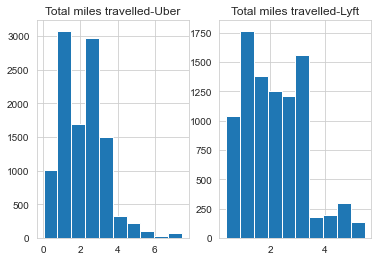

In [55]:
#Question 8: Is Total number of miles travelled by Uber < Total number of miles travelled by Lyft?

sum_miles_uber=print(uber['distance'].sum()) 
sum_miles_lyft=print(lyft['distance'].sum())

figure, axes = plt.subplots(1, 2)

uber['distance'].hist(ax=axes[0])
lyft['distance'].hist(ax=axes[1])
axes[0].set_title('Total miles travelled-Uber')
axes[1].set_title('Total miles travelled-Lyft')


#Answer 8: Clearly, sum of miles travelled by uber is greater than sum of miles travelled by Lyft

Text(0.5, 1.0, 'Price VS Distance')

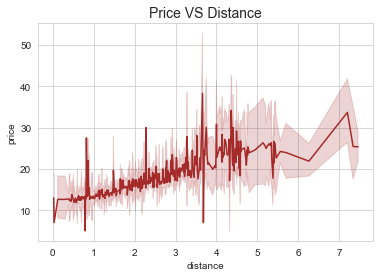

In [56]:
sns.lineplot(x='distance', y='price', data=cars,color='brown')
plt.title('Price VS Distance', fontsize=14)

<AxesSubplot:xlabel='hour', ylabel='distance'>

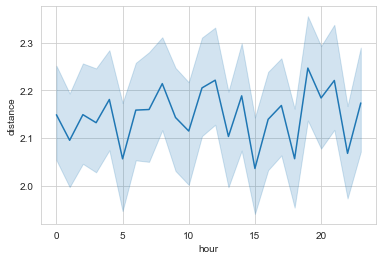

In [57]:
#Question 9: What are the peak hours for Uber?
sns.lineplot(x='hour', y='distance', data=uber)
#Answer 9: 8am,12pm,7pm and 9pm are the peak hours for Uber

<AxesSubplot:xlabel='hour', ylabel='distance'>

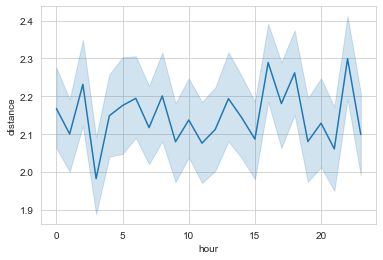

In [58]:
#Question 10: What are the peak hours for Lyft?
sns.set_style("whitegrid")
sns.lineplot(x='hour', y='distance', data=lyft)
#Answer 10: 3am,4pm,6pm and 11pm are the peak hours for Lyft

### Conclusion : 

In [60]:
#1. Uber is preferred to Lyft.
#2. Along with UberXL, other cab types like Black, UberX, Black SUV, Uberpool and Taxi are also highly preferred.
#3. Surge_Multiplier is high (2.5) for Lyft and Lyft XL
#4. The price(USD) of the cab is high for Uber and Lyft when the Surge_Multiplier is 2
#5. People prefer Uber to Lyft when it comes to travelling long distances. UberXL, Black, UberX, WAV, Black SUV, UberPool are different categories of cars
#6. Most of the rides start from Theatre District and North Station
#7. Most number of rides end at NorthEnd, Haymarket square and Northeastern University
#8. Sum of miles travelled by uber is greater than sum of miles travelled by Lyft
#9. 8am,12pm,7pm and 9pm are the peak hours for Uber
#10. 3am,4pm,6pm and 11pm are the peak hours for Lyft